# BankData

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

# download data set: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
# info: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

# load data
bankdata = pd.read_csv("./bill_authentication.csv")  

# see the data
bankdata.shape  

# see head
bankdata.head()  

# data processing
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# train the SVM
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

# predictions
y_pred = svclassifier.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))  

-----   Confusion Matrix   -----
[[156   2]
 [  2 115]]
----- Classification Report -----
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.98      0.98      0.98       117

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Iris DataSet

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames) 

# process
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']  

# train
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [99]:
# PolyNomial Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=8))
])

poly_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = poly_kernel_svm_clf.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[ 9  0  1]
 [ 0 10  1]
 [ 1  4  4]]
----- Classification Report -----
                 precision    recall  f1-score   support

    Iris-setosa       0.90      0.90      0.90        10
Iris-versicolor       0.71      0.91      0.80        11
 Iris-virginica       0.67      0.44      0.53         9

      micro avg       0.77      0.77      0.77        30
      macro avg       0.76      0.75      0.74        30
   weighted avg       0.76      0.77      0.75        30



In [100]:
# Gaussian Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf"))
])


rbf_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = rbf_kernel_svm_clf.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
----- Classification Report -----
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [101]:
# Sigmoid Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sigmoid_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="sigmoid"))
])


sigmoid_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = sigmoid_kernel_svm_clf.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
----- Classification Report -----
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Plots (using 2 features because its hard to make 4 dimmensional graphs)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames) 

# process
def label(input):
    if input =='Iris-versicolor':
        return 1
    elif input == 'Iris-setosa':
        return 2
    else:
        return 3

X = irisdata.drop('Class', axis=1).drop('petal-length', axis=1).drop('petal-width', axis=1).as_matrix()
y = irisdata['Class'].as_matrix()
y = list(map(label, y))

# train
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [103]:
# PolyNomial Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=8))
])


poly_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = poly_kernel_svm_clf.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[ 2  0 12]
 [ 0  4  7]
 [ 0  0  5]]
----- Classification Report -----
              precision    recall  f1-score   support

           1       1.00      0.14      0.25        14
           2       1.00      0.36      0.53        11
           3       0.21      1.00      0.34         5

   micro avg       0.37      0.37      0.37        30
   macro avg       0.74      0.50      0.38        30
weighted avg       0.87      0.37      0.37        30



In [104]:
# Gaussian Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf"))
])


rbf_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = rbf_kernel_svm_clf.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[ 7  0  7]
 [ 0 11  0]
 [ 1  0  4]]
----- Classification Report -----
              precision    recall  f1-score   support

           1       0.88      0.50      0.64        14
           2       1.00      1.00      1.00        11
           3       0.36      0.80      0.50         5

   micro avg       0.73      0.73      0.73        30
   macro avg       0.75      0.77      0.71        30
weighted avg       0.84      0.73      0.75        30



In [105]:
# Sigmoid Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sigmoid_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="sigmoid"))
])


sigmoid_kernel_svm_clf.fit(X_train, y_train)

# predictions
y_pred = sigmoid_kernel_svm_clf.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print("-----   Confusion Matrix   -----")
print(confusion_matrix(y_test,y_pred))
print("----- Classification Report -----")
print(classification_report(y_test,y_pred))

-----   Confusion Matrix   -----
[[12  0  2]
 [ 1 10  0]
 [ 3  0  2]]
----- Classification Report -----
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       1.00      0.91      0.95        11
           3       0.50      0.40      0.44         5

   micro avg       0.80      0.80      0.80        30
   macro avg       0.75      0.72      0.73        30
weighted avg       0.80      0.80      0.80        30



In [106]:
def plot(clf, title):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    fig, ax = plt.subplots()
    # title for the plots
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('Sepal-Width')
    ax.set_xlabel('Sepal-Length')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

No handles with labels found to put in legend.


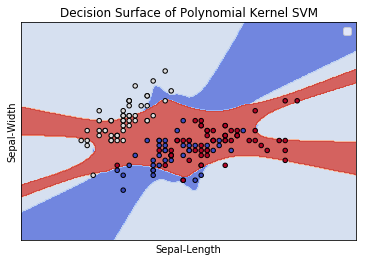

In [107]:
plot(poly_kernel_svm_clf, 'Decision Surface of Polynomial Kernel SVM')

No handles with labels found to put in legend.


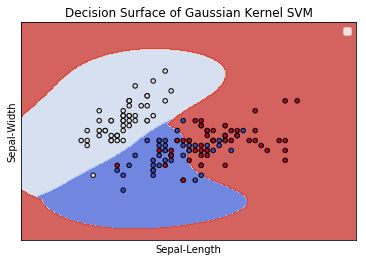

In [108]:
plot(rbf_kernel_svm_clf, 'Decision Surface of Gaussian Kernel SVM')

No handles with labels found to put in legend.


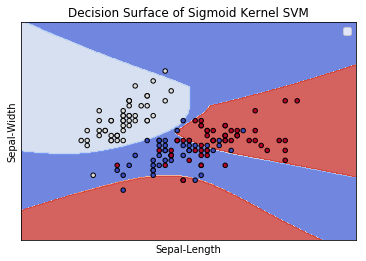

In [109]:
plot(sigmoid_kernel_svm_clf, 'Decision Surface of Sigmoid Kernel SVM')